# Airfoil Flow Field Prediction using Data Driven and Physics Informed Neural Networks

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def joukowsky_airfoil(center, n_points):
    radius = abs(center - complex(1))
    theta = np.linspace(0, 2*np.pi, n_points)
    circle_points = center + radius * np.exp(1j * theta)
    airfoil_points = circle_points + 1 / circle_points

    x = np.real(airfoil_points)
    y = np.imag(airfoil_points)

    x -= min(x)
    x_range = max(x)

    x /= x_range
    y /= x_range

    transformed_points = np.vstack((x, y)).T

    return transformed_points

def visualize_airfoil(center, n_points = 1000):
    points = joukowsky_airfoil(center, n_points)
    plt.figure(figsize=(6, 3))
    plt.plot(points[:, 0], points[:, 1])
    plt.title("NACA Airfoil Shape")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.axis('equal')
    plt.show()

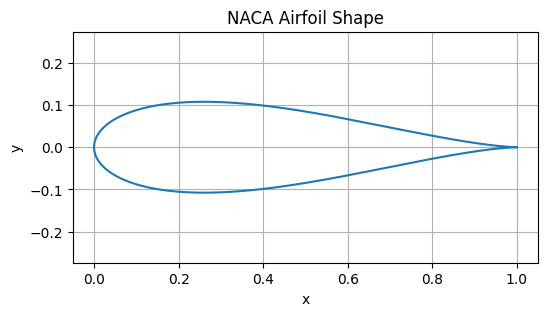

In [5]:
visualize_airfoil(complex(-0.2, 0.0))

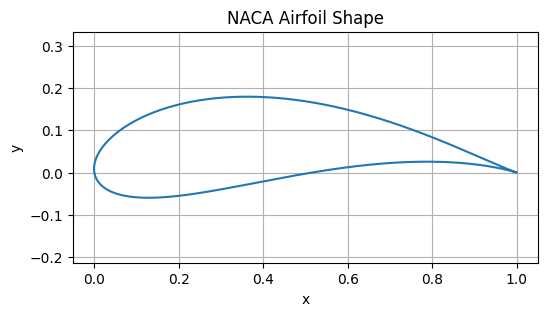

In [6]:
visualize_airfoil(complex(-0.2, 0.2))

In [7]:
from IPython.display import display, HTML

# Specify the paths or URLs of the images
image_path_or_url_1 = "domain.png"
image_path_or_url_2 = "domain_ppt.png"

# Define the HTML code to create a two-column layout
html_code = f"""
<div style="display: flex; justify-content: space-between; width: 100%">
    <div style="width: 60%;">
        <img src="{image_path_or_url_1}" alt="Image 1" style="width: 100%;">
    </div>
    <div style="width: 40%;">
        <img src="{image_path_or_url_2}" alt="Image 2" style="width: 100%;">
    </div>
</div>
"""

# Display the HTML code
display(HTML(html_code))


In [8]:
from IPython.display import display, HTML

# Specify the paths or URLs of the images
image_path_or_url_1 = "result.png"
image_path_or_url_2 = "loss_curve.png"

# Specify captions for the images
caption_1 = "Pressure Plot with Streamlines after 5000 epochs(Zoomed in view)"
caption_2 = "Loss Curve after 5000 epochs"

# Define the HTML code to create a two-column layout with captions
html_code = f"""
<div style="display: flex; justify-content: space-between; width: 100%">
    <figure style="width: 58%;">
        <img src="{image_path_or_url_1}" alt="{caption_1}" style="width: 100%;">
        <figcaption>{caption_1}</figcaption>
    </figure>
    <figure style="width: 38%;">
        <img src="{image_path_or_url_2}" alt="{caption_2}" style="width: 100%;">
        <figcaption>{caption_2}</figcaption>
    </figure>
</div>
"""

# Display the HTML code
display(HTML(html_code))


In [9]:
from scipy.optimize import minimize

# Define the objective function
def objective_function(z):
    x, y = z
    # Define your complex function here
    result = complex_function(x, y)
    return result

# Define the complex function
def complex_function(x, y):
    # Replace this with your actual complex function
    return x**2 + y**2  # Example: Euclidean distance from the origin

# Initial guess
initial_guess = [0.0, 0.0]

# Define the bounds for x and y
bounds = [(-0.3, 0.1), (-0.3, 0.1)]

# Set the tolerance
tolerance = 1e-4

# Use the Nelder-Mead algorithm to minimize the objective function
result = minimize(objective_function, initial_guess, method='nelder-mead', bounds=bounds, tol=tolerance)

# Print the result
print("Minimum found at:", result.x)
print("Minimum function value:", result.fun)
print("Number of iterations:", result.nit)
print("Number of function evaluations:", result.nfev)

Minimum found at: [0. 0.]
Minimum function value: 0.0
Number of iterations: 4
Number of function evaluations: 9


In [10]:
%%capture
from pinn_joukowski import FlowSolver

ModuleNotFoundError: No module named 'pinn_joukowski'

In [ ]:
desired_Cp = np.load('/kaggle/input/ae646-final/saved_array.npy')
desired_Cp = desired_Cp.T
print(desired_Cp.shape)

In [ ]:
%%capture

funcs = []

def objective_function(z):
    x, y = z
    z = complex(x, y)
    print(z)
    solver = FlowSolver(z, 1000)
    C_p = solver.run_simulation(percent = 1)
    
    C_p = C_p.T
    squared_diff = (desired_Cp[2] - C_p[2]) ** 2
    distances = np.linalg.norm(C_p[:2, :] - np.roll(C_p[:2, :], shift=-1, axis=1), axis=0)
    
    weighted_squared_diff = squared_diff * distances
    num = sum(weighted_squared_diff)
    den = sum(distances)    
    
    funcs.append(num/den)
    print(num/den)
    
    return (num/den)


# Initial guess
initial_guess = [-0.12, 0.12]

# Define the bounds for x and y
bounds = [(-0.3, -0.1), (0.0, 0.3)]

# Set the tolerance
tolerance = 1e-2

result = minimize(objective_function, initial_guess, method='nelder-mead', bounds=bounds, tol=tolerance)


In [ ]:
# Print the result
print("Minimum found at:", result.x)
print("Minimum function value:", result.fun)
print("Number of iterations:", result.nit)
print("Number of function evaluations:", result.nfev)

plt.plot(funcs)